# Importing Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/covid-data/imputed-data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,01/22/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
1,01/23/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
2,01/24/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
3,01/25/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
4,01/26/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048


# PreProcessing Dataset

In [3]:
# Check dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145769 entries, 0 to 145768
Data columns (total 58 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     145769 non-null  object 
 1   county_fips                              145769 non-null  int64  
 2   county_name                              145769 non-null  object 
 3   state_fips                               145769 non-null  int64  
 4   state_name                               145769 non-null  object 
 5   covid_19_confirmed_cases                 145769 non-null  float64
 6   covid_19_deaths                          145769 non-null  float64
 7   social_distancing_total_grade            145769 non-null  object 
 8   social_distancing_encounters_grade       145769 non-null  object 
 9   social_distancing_travel_distance_grade  145769 non-null  object 
 10  daily_state_test                

In [4]:
# Count missing values per column
df.isnull().sum()


date                                       0
county_fips                                0
county_name                                0
state_fips                                 0
state_name                                 0
covid_19_confirmed_cases                   0
covid_19_deaths                            0
social_distancing_total_grade              0
social_distancing_encounters_grade         0
social_distancing_travel_distance_grade    0
daily_state_test                           0
precipitation                              0
temperature                                0
virus_pressure                             0
total_population                           0
female_percent                             0
area                                       0
population_density                         0
latitude                                   0
longitude                                  0
hospital_beds_ratio                        0
ventilator_capacity_ratio                  0
icu_beds_r

In [5]:
# Summary statistics of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
county_fips,145769.0,11294.986101,5755.578051,1003.000000,6039.000000,12109.000000,17071.000000,1.908500e+04
state_fips,145769.0,11.216912,5.746805,1.000000,6.000000,12.000000,17.000000,1.900000e+01
covid_19_confirmed_cases,145769.0,17.422902,108.313131,0.000000,0.000000,0.000000,5.000000,8.903000e+03
covid_19_deaths,145769.0,0.400284,2.862694,0.000000,0.000000,0.000000,0.000000,1.420000e+02
daily_state_test,145769.0,13028.396919,23610.581637,0.000000,50.000000,4438.000000,13313.000000,1.879260e+05
precipitation,145769.0,29.785673,86.780567,0.000000,0.000000,0.000000,18.000000,3.048000e+03
temperature,145769.0,16.594227,9.577923,-42.200000,9.640000,18.680000,24.620000,6.560000e+01
virus_pressure,145769.0,17.175501,66.953436,0.000000,0.000000,1.857143,9.333333,3.178667e+03
total_population,145769.0,183719.266881,595690.653204,1876.000000,16134.000000,33976.000000,124806.000000,1.010552e+07
female_percent,145769.0,0.499320,0.023412,0.268351,0.494141,0.503701,0.511262,5.687054e-01


In [6]:
# Convert the date column to datetime format
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["date"].head()


<ipython-input-6-15ed6e0ad671>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors='coerce')


0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: date, dtype: datetime64[ns]

In [7]:
# Drop categorical columns with no variance
df_cleaned = df.drop(columns=["county_name", "state_name", "social_distancing_total_grade",
                              "social_distancing_encounters_grade", "social_distancing_travel_distance_grade"])

# Check updated structure
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145769 entries, 0 to 145768
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           145769 non-null  datetime64[ns]
 1   county_fips                    145769 non-null  int64         
 2   state_fips                     145769 non-null  int64         
 3   covid_19_confirmed_cases       145769 non-null  float64       
 4   covid_19_deaths                145769 non-null  float64       
 5   daily_state_test               145769 non-null  float64       
 6   precipitation                  145769 non-null  float64       
 7   temperature                    145769 non-null  float64       
 8   virus_pressure                 145769 non-null  float64       
 9   total_population               145769 non-null  int64         
 10  female_percent                 145769 non-null  float64       
 11  

In [8]:
# Fill missing values with median for numerical columns
df_cleaned.fillna(df_cleaned.median(), inplace=True)

# Check if any missing values remain
df_cleaned.isnull().sum().sum()


0

# Checking Data distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


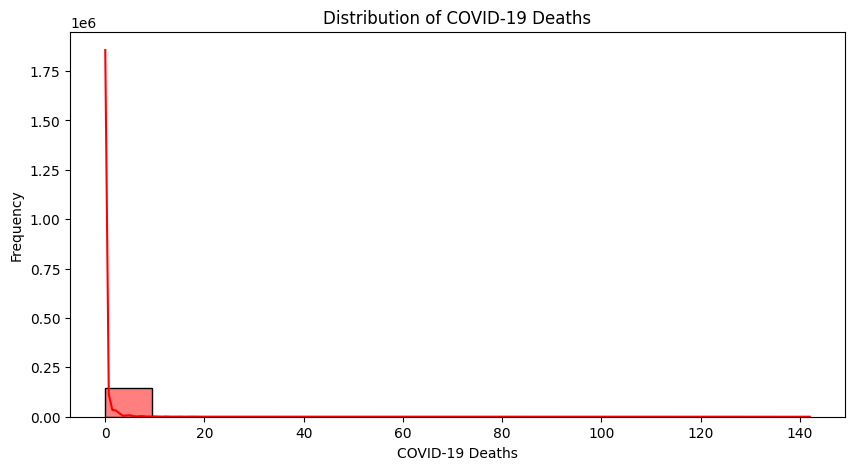

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["covid_19_deaths"], bins=15, kde=True, color='red')
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Frequency")
plt.title("Distribution of COVID-19 Deaths")
plt.show()


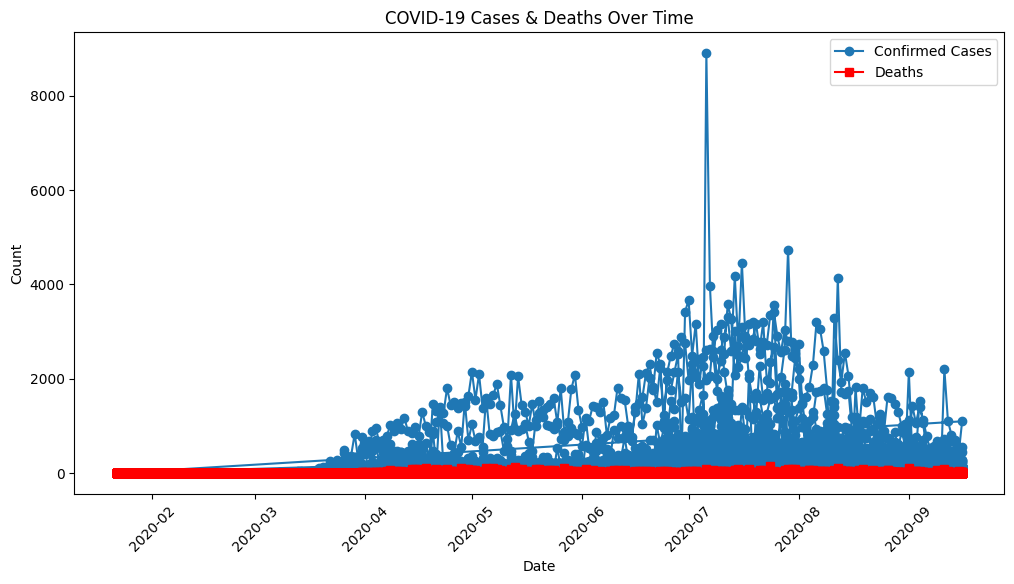

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["date"], df_cleaned["covid_19_confirmed_cases"], label="Confirmed Cases", marker='o')
plt.plot(df_cleaned["date"], df_cleaned["covid_19_deaths"], label="Deaths", marker='s', color='red')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Cases & Deaths Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


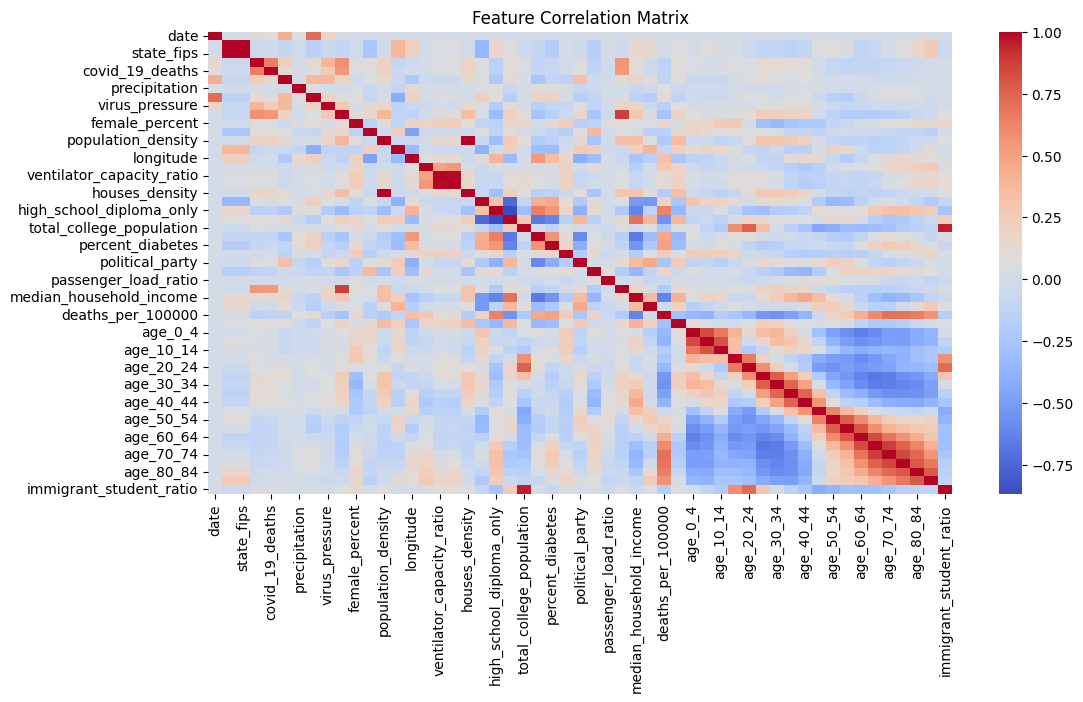

In [11]:
# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


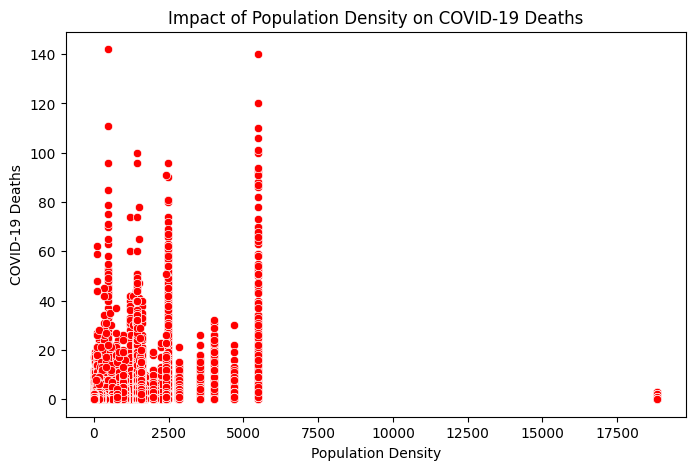

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["population_density"], y=df_cleaned["covid_19_deaths"], color="red")
plt.xlabel("Population Density")
plt.ylabel("COVID-19 Deaths")
plt.title("Impact of Population Density on COVID-19 Deaths")
plt.show()


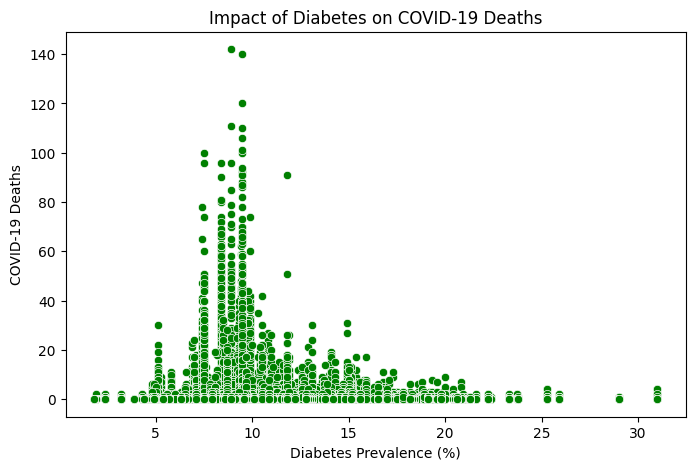

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["percent_diabetes"], y=df_cleaned["covid_19_deaths"], color="green")
plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("COVID-19 Deaths")
plt.title("Impact of Diabetes on COVID-19 Deaths")
plt.show()


In [14]:
print(df_cleaned.columns)


Index(['date', 'county_fips', 'state_fips', 'covid_19_confirmed_cases',
       'covid_19_deaths', 'daily_state_test', 'precipitation', 'temperature',
       'virus_pressure', 'total_population', 'female_percent', 'area',
       'population_density', 'latitude', 'longitude', 'hospital_beds_ratio',
       'ventilator_capacity_ratio', 'icu_beds_ratio', 'houses_density',
       'less_than_high_school_diploma', 'high_school_diploma_only',
       'some_college_or_higher', 'total_college_population', 'percent_smokers',
       'percent_diabetes', 'Religious_congregation_ratio', 'political_party',
       'airport_distance', 'passenger_load_ratio', 'meat_plants',
       'median_household_income', 'percent_insured', 'deaths_per_100000',
       'gdp_per_capita', 'age_0_4', 'age_5_9', 'age_10_14', 'age_15_19',
       'age_20_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44',
       'age_45_49', 'age_50_54', 'age_55_59', 'age_60_64', 'age_65_69',
       'age_70_74', 'age_75_79', 'age_80_84', '

# Making new variable for ages 65 +

In [15]:
df_cleaned["age_65_plus"] = (
    df_cleaned["age_65_69"] + 
    df_cleaned["age_70_74"] + 
    df_cleaned["age_75_79"] + 
    df_cleaned["age_80_84"] + 
    df_cleaned["age_85_or_higher"]
)


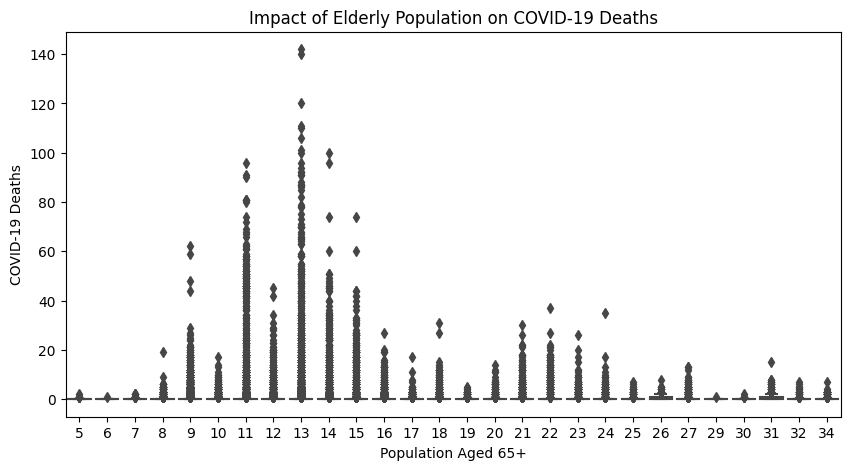

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["age_65_plus"], y=df_cleaned["covid_19_deaths"])
plt.xlabel("Population Aged 65+")
plt.ylabel("COVID-19 Deaths")
plt.title("Impact of Elderly Population on COVID-19 Deaths")
plt.show()
